# forward propagation

- forward propagation is how NN propagates signals to compute outputs


- activation $a_j^l$ of jth neuron on the lth layer is related to the activations in the $l-1$ th layer

$$
a_j^l = \sigma (\sum _k w_{jk}^l a_k^{l-1} + b_j^l )
$$

where $\sigma$ is a non-linear activation function: sigmoid function

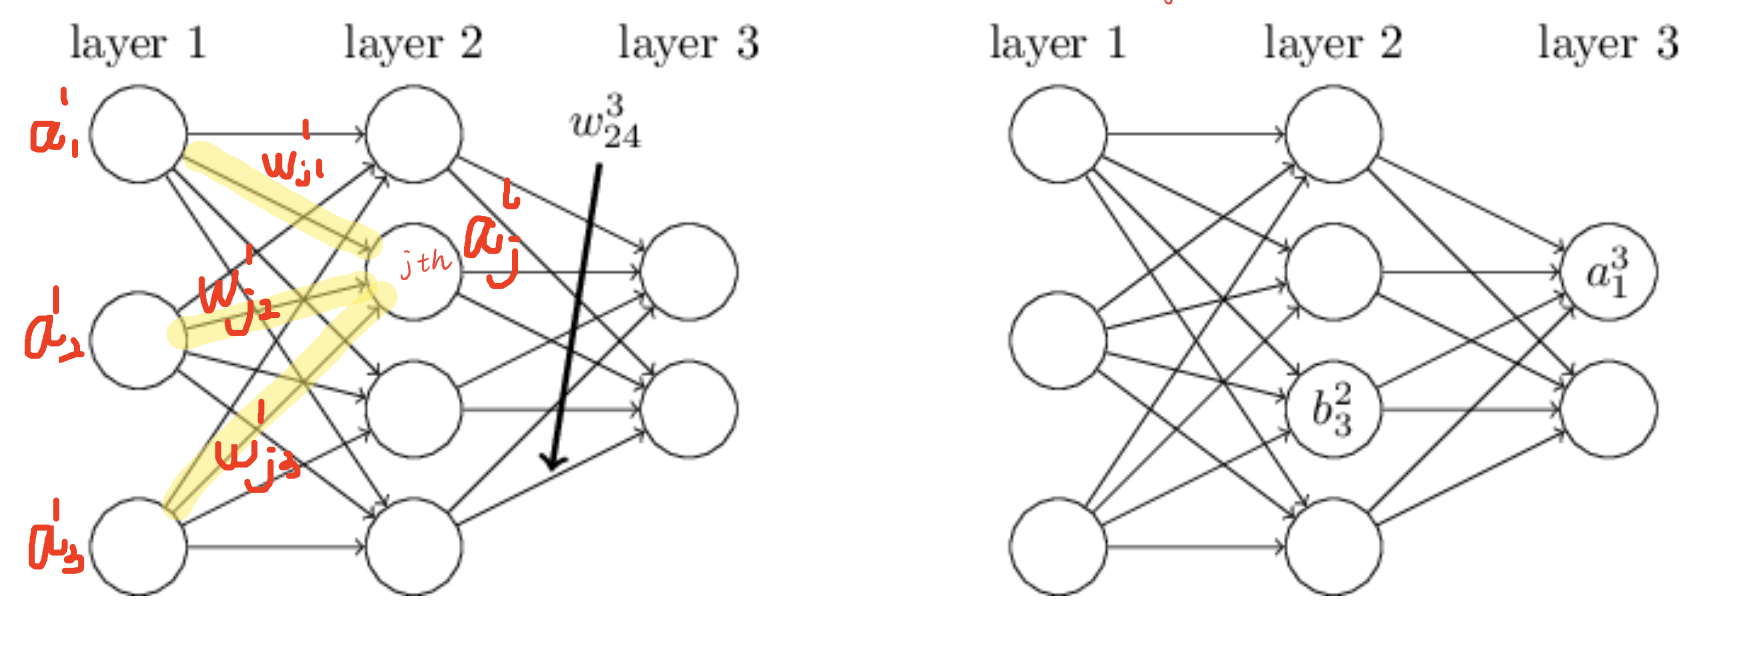

- to simplify expression, use matrix notation rather than vector notation

$$
a^l = \sigma(w^l a^{l-1} + b^l)
$$

where $w^l$ is weights of layer $l$

$a^{l-1}$ is activation of layer $l-1$


- another way to simplify notation: use an intermediate quantity $z^l$, which is weighted input to neurons in layer $l$

$$
z^l = w^l a^{l-1} + b^l
\\[1em]
a^l = \sigma(z^l)
$$

# backpropagation

- backpropagation is workhorse of learning NN
- goal of backpropagation: compute partial derivatives of the cost function $C$ w.r.t. to any weight $w$ or bias $b$ in the network

$$
\frac{\partial C}{\partial w}, \frac{\partial C}{\partial b}
$$

## cost function

- cost function, e.g., mean squared error (MSE)
    
    $$
    C = \frac{1}{2n} \sum _x \left\| y(x) - a^L (x)\right\|^2
    $$
    
    cost function is sum of quadratic cost over training examples $x$
    
    where $y(x)$ is desired output
    
    $a^L (x)$ is vector of activation output of network when $x$ is input
    
    $L$ is the number of layers in the network, the output layer

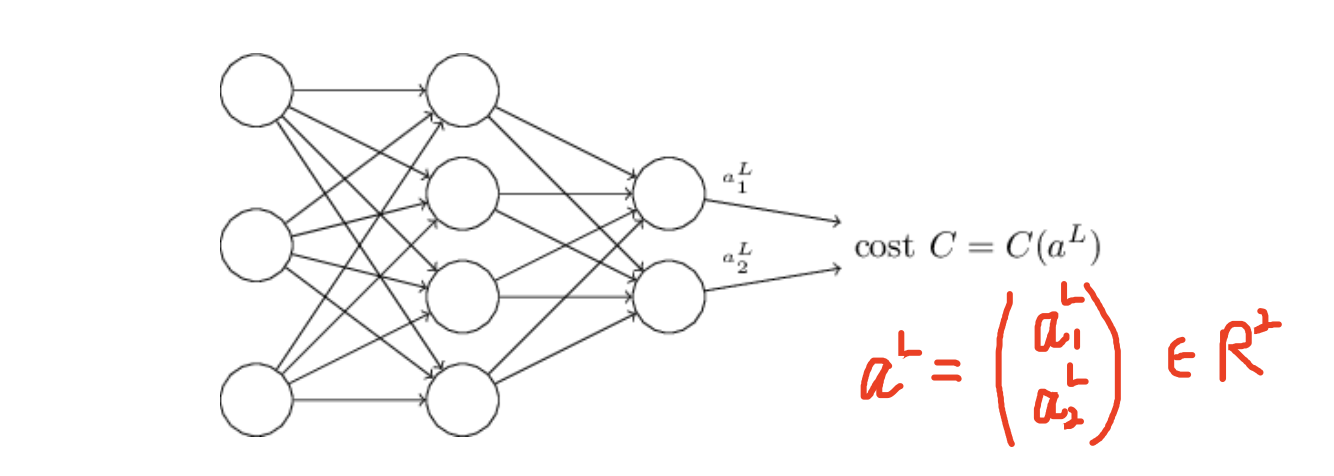

- reason for compute partial derivative of cost function w.r.t weight and bias: 

    cost function can be written as a function of output of neural network, 
    
    $$
    cost = C(a^L)
    $$
    
    while output is a function of weight and bias
    
    then cost function can be written as a function of weight and bias
    
    $$
    cost = C(w, b)
    $$
    
    also, cost can be written as an average loss of batch training samples
    
    $$
    cost = \frac{1}{|B|}\sum_i L(w, b)
    $$

## error forward

- suppose you made a small change $\Delta w_{jk}^l$ to a weight $w_{jk}^l$ (the kth weight for the jth neuron in the $l$-th layer)

    $\Rightarrow$ cause a change $\Delta a_{j}^l$ in the activation of the output neuron $a_{j}^l$
    
    $$
    \Delta a_{j}^l \approx \frac{\partial a_{j}^l}{\partial w_{jk}^l} \Delta w_{jk}^l
    $$
    
    $\Rightarrow$ cause a change $\Delta a_{q}^{l+1}\  (q = 1, 2, ...)$ in all the activations of neurons in the next layer $a_q^{l+1}\  (q = 1, 2, ...)$
    
    $$
    \Delta a_{q}^{l+1} \approx \frac{\partial a_{q}^{l+1}}{\partial a_{j}^l} \color{red}{\Delta a_{j}^l} \approx \frac{\partial a_{q}^{l+1}}{\partial a_{j}^l} \left(\frac{\partial a_{j}^l}{\partial w_{jk}^l} \Delta w_{jk}^l \right)
    $$
    
    $\Rightarrow$ cause a change of activation in specific neurons from layer $l+1$ to output layer.. $a_j^l, a_{q}^{l+1},..., a_{n}^{L-1}, a_m^L$
    
    $\Rightarrow$ cause a change $\Delta y$ to the output
    
    $\Rightarrow$ cause a change $\Delta C$ to the cost function
    
    $$
    \Delta C \approx \frac{\partial C}{\partial w_{jk}^l} \Delta w_{jk}^l
    $$

- tracking the change:

    this suggests that if we track how a weight change $\Delta w_{jk}^l$ propagates to a change in the cost function $\Delta C$,
    
    then we can compute gradient of cost function w.r.t the weight by
    
    $$
    \frac{\partial C}{\partial w_{jk}^l} \approx  \frac{\Delta C} {\Delta w_{jk}^l}
    $$


$$
\Delta C \approx \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l} \Delta w_{jk}^l
$$

 
$\Rightarrow$

$$
\frac{\partial C}{\partial w_{jk}^l} \approx  \frac{\Delta C} {\Delta w_{jk}^l} \approx  \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l}
$$

$\Rightarrow$ summing over all paths

$$
\frac{\partial C}{\partial w_{jk}^l} \approx  \sum_{m,n,p...q}  \frac{\partial C}{\partial a_m^L} \frac{\partial a_m^L}{\partial a_n^{L-1}}\frac{\partial a_n^{L-1}}{\partial a_p^{L-2}}\cdots \frac{\partial a_q^{l+1}}{\partial a_j^l}\frac{\partial a_j^l}{\partial w_{jk}^l}
$$

## error at the node

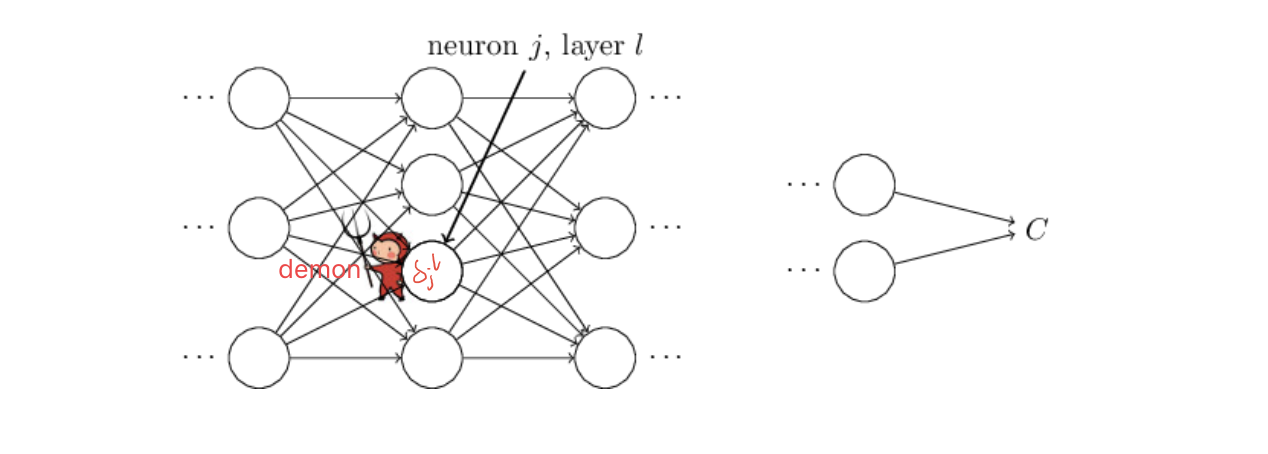

- first introduce an intermediate quantity $\delta _j^l$, i.e., error in $z_j^l$

    the error in the jth neuron and the $l$-th layer before nonlinear activation

    
    backpropagation enables us to compute $\delta _j^l$ which we will relate to $\frac{\partial C}{\partial w_{jk}^l}$ and $\frac{\partial C}{\partial b_{j}^l}$ in one step

- change $\delta _j^l \Rightarrow \delta _j^l \Delta z_j^l$ change in cost


- case 1: $\delta _j^l$ is large (either positive or negative)

    demon can lower cost a lot by choosing $\Delta z_j^l$ with opposite sign of $\delta _j^l$
    

- case 2: $\delta _j^l \rightarrow 0$ is small 

    can't decrease cost much by perturbing $z_j^l$

## 4 fundamental equation of backpropagation

1. error at output layer $L$

$$
\delta ^L = \nabla_a C \odot \sigma' (z^L)
$$


2. error at $l$-th layer

$$
\delta ^l = \left( (w^{l+1})^T \delta ^{l+1}\right)\odot \sigma' (z^L)
$$


3. error at bias of jth node of $l$ th layer

$$
\frac{\partial C}{\partial b_{j}^l}=\delta_j ^l
$$

4. error at weight of kth node of $l-1$ th layer to jth node of $l$ th layer

$$
\frac{\partial C}{\partial w_{jk}^l}=a_k^{l-1}\delta_j ^l
$$

### Proof

#### error at output layer L

- by definition

$$
\delta ^L = \frac{\partial C}{\partial z^L} = \begin{bmatrix}
\frac{\partial C}{\partial z_1^L} \\
\frac{\partial C}{\partial z_2^L} \\
\vdots \\ 
\frac{\partial C}{\partial z_j^L}
\end{bmatrix} = \begin{bmatrix}
\delta_1 ^L \\
\delta_2 ^L \\
\vdots \\ 
\delta_j ^L
\end{bmatrix}
$$

- error of jth node of output layer: $\delta_j ^L$

$$
\delta_j ^L = \frac{\partial C}{\partial z_j^L}
$$

- use multivariate chain rule:

$$
\delta_j ^L = \frac{\partial C}{\partial a_j^L}  \frac{\partial a_j^L}{\partial z_j^L}  = \frac{\partial C}{\partial a_j^L} \sigma' (z_j^L)
$$

where $a_j^L = \sigma(z_j^L)$ is activation of $z_j^L$

#### error at  l-th layer

- error at jth node of $l$ th layer: $\delta_j^l$

$$
\delta_j^l = \sum _k \frac{\partial z_k^{l+1}}{\partial z_j^l} \delta_k ^{l+1} = \sum _k \frac{\partial w_{kj}^{l+1} \sigma(z_j)^l+ b_j^{l+1}}{\partial z_j^l} \delta_k ^{l+1} 
$$

$$
= \sum _k w_{kj}^{l+1}\sigma'(z_j)^l \delta_k ^{l+1} = \sum _k w_{kj}^{l+1} \delta_k ^{l+1}  \sigma'(z_j)^l
$$

#### error at bias

- error at bias of jth node of  lth layer

    use multivariate chain rule

$$
\frac{\partial C}{\partial b_{j}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial z_{j}^l}{\partial b_{j}^l} = \frac{\partial C}{\partial z_{j}^l}\frac{\partial \sum_k (w_{jk}^l a_j^{l-1} +b_j^l)}{\partial b_{j}^l} = \frac{\partial C}{\partial z_{j}^l}\cdot 1 = \delta_j^l
$$

#### error at weight

- error at weight of kth node of $l-1$ th layer to jth node of $l$ th layer

    use multivariate chain rule

$$
\frac{\partial C}{\partial w_{jk}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial z_{j}^l}{\delta w_{jk}^l}=\frac{\partial C}{\partial z_{j}^l}\frac{\partial (w_{jk}^l a_k^{l-1} +b_k^l)}{\partial w_{jk}^l} =\frac{\partial C}{\partial z_{j}^l}a_k^{l-1}=a_k^{l-1}\delta_j ^l
$$

## insights

- 4 fundamental equations hold for **any activation functions**

    we can use these equations to design activation functions
    
    e.g., choose activation function such that its derivative is always positive and never close to 0, e.g., ReLU

- consider the error of output layer

$$
\delta_j ^L = \frac{\partial C}{\partial a_j^L} \sigma' (z_j^L)
$$

$\sigma$ is sigmoid function

when output neuron is **saturated** ($z$ is infinitely small or large  -> $\sigma \approx 0$ or 1, $\sigma$ becomes very flat)

$\Rightarrow \sigma' (z_j^L) \approx 0 \Rightarrow \delta_j ^L \approx 0 \Rightarrow $ weight in final layer will update slowly

- similar insights for other layers:

    weights will update slowly if either the input neuron is low activation or the output neuron has saturated (i.e., low or high activation)

# backpropagation with SGD

1. input a set of training examples


2. for each training example $x$: set the input activation $a^{1}$ (1 means the first layer) and do the following:

- feedforward: for each $l=2, 3,...,L$, compute

$$
z^{l} = w^l a^{ l-1} + b^l
$$

$$
a^{l} = \sigma (z^{l})
$$
    
    
- compute output error
$$
\delta ^{L} =\nabla_a C \odot \sigma' (z^{l})
$$

    
- backpropagate the error: for each $l=L-1, L-2, ..., 2$, 

    compute error at nodes of $l$ th layer

$$
\delta ^{l} = \left( (w^{l+1})^T \delta ^{ l+1}\right)\odot \sigma' (z^{l})
$$


- compute gradient of cost function w.r.t any weights and biases

$$
\frac{\partial C}{\partial w^{l}}= \delta^{l}(a^{l-1})^T
\\[1em]
\frac{\partial C}{\partial b^{l}}=\delta^{l}
$$


3. gradient descent: for each $l=L, L-1, L-2, ..., 2$

    move weight or bias in the opposite direction of gradient by a factor of learning rate $\eta$


- update the weights
    
$$
w^{l+1}\leftarrow w^l - \frac{\eta}{m} \sum_x \frac{\partial C}{\partial w^{l}}= w^l - \frac{\eta}{m} \sum_x \delta^{l}(a^{l-1})^T
$$   

- update the biases

$$
b^{l+1} \leftarrow b^l - \frac{\eta}{m} \sum_x \frac{\partial C}{\partial b^{l}}= b^l - \frac{\eta}{m} \sum_x \delta^{l}
$$  